In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/healthcare-dataset/healthcare_dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/healthcare-dataset/healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


**Data Description: Healthcare Dataset**
This dataset contains information about patients admitted to a hospital, including demographic details, medical conditions, treatments, and billing information. The dataset comprises the following columns:

* Name: Names of the patients admitted to the hospital.
* Age: Age of the patients at the time of admission.
* Gender: Gender of the patients (e.g., male, female).
* Blood Type: Blood type of the patients.
* Medical Condition: Description of the medical condition or diagnosis for which the patient is admitted.
* Date of Admission: Date when the patient was admitted to the hospital.
* Doctor: Name or identifier of the doctor responsible for the patient's care.
* Hospital: Name or identifier of the hospital where the patient is admitted.
* Insurance Provider: Name of the insurance provider covering the patient's medical expenses.
* Billing Amount: Amount billed to the patient or their insurance provider for medical services received during the hospital stay.
* Room Number: Identifier of the room where the patient is accommodated.
* Admission Type: Type of admission, such as emergency, elective, or transfer.
* Discharge Date: Date when the patient was discharged from the hospital.
* Medication: List of medications prescribed to the patient during their hospitalization.
* Test Results: Results of medical tests conducted on the patient during their hospital stay.

This dataset provides valuable insights into patient demographics, medical conditions, treatment patterns, and hospital operations. It can be used for various analyses, including patient outcome prediction, resource allocation optimization, and healthcare quality improvement initiatives.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [4]:
df.drop_duplicates(inplace=True)
print(f'The Training Dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The Training Dataset has 54966 rows and 15 columns.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                54966 non-null  object 
 1   Age                 54966 non-null  int64  
 2   Gender              54966 non-null  object 
 3   Blood Type          54966 non-null  object 
 4   Medical Condition   54966 non-null  object 
 5   Date of Admission   54966 non-null  object 
 6   Doctor              54966 non-null  object 
 7   Hospital            54966 non-null  object 
 8   Insurance Provider  54966 non-null  object 
 9   Billing Amount      54966 non-null  float64
 10  Room Number         54966 non-null  int64  
 11  Admission Type      54966 non-null  object 
 12  Discharge Date      54966 non-null  object 
 13  Medication          54966 non-null  object 
 14  Test Results        54966 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.7+ MB


In [6]:
for col in df.columns:
    if(df[col].isnull().sum() > 0):
        print(f"column with null values :- {col}")

No Null values are present in our dataset.

### EDA

In [7]:
# making name lowercase for uniformity
df['Name'] = df['Name'].str.lower()
# Converting "Date of Admission" and "Discharge Date" to datetime type
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [8]:
df.describe()

,Age,Date of Admission,Billing Amount,Room Number,Discharge Date
count,54966.000000,54966,54966.000000,54966.000000,54966
mean,51.535185,2021-11-01 17:35:29.505512448,25544.306284,301.124404,2021-11-17 05:34:28.202161408
min,13.000000,2019-05-08 00:00:00,-2008.492140,101.000000,2019-05-09 00:00:00
25%,35.000000,2020-07-28 00:00:00,13243.718641,202.000000,2020-08-13 00:00:00
50%,52.000000,2021-11-02 00:00:00,25542.749145,302.000000,2021-11-18 00:00:00
75%,68.000000,2023-02-03 00:00:00,37819.858159,401.000000,2023-02-19 00:00:00
max,89.000000,2024-05-07 00:00:00,52764.276736,500.000000,2024-06-06 00:00:00
std,19.605661,NaN,14208.409711,115.223143,NaN


In [9]:
df.describe(include="object").T

,count,unique,top,freq
Name,54966,40235,michael williams,24
Gender,54966,2,Male,27496
Blood Type,54966,8,A-,6898
Medical Condition,54966,6,Arthritis,9218
Doctor,54966,40341,Michael Smith,27
Hospital,54966,39876,LLC Smith,44
Insurance Provider,54966,5,Cigna,11139
Admission Type,54966,3,Elective,18473
Medication,54966,5,Lipitor,11038
Test Results,54966,3,Abnormal,18437


Key Observations:

1. **Patient Age Range**:
   Patients span ages from 13 to 89 years, with an average age around 52 years.

2. **Hospital Room Capacity**:
   The hospital offers a diverse range of rooms, numbered from 101 to 500, ensuring flexible accommodation options for patients.

3. **Temporal Coverage**:
   Data spans from May 8, 2019, to May 7, 2024, providing a comprehensive five-year perspective on patient admissions.

4. **Admission Types**:
   Patients are admitted through three main routes:
   - Emergency
   - Elective
   - Transfer

5. **Blood Type Distribution**:
   Various blood types are represented, with A- being the most common among patients.

6. **Hospital Distribution**:
   Admissions originate from 44 different hospitals, with LLC Smith recording the highest frequency.

7. **Doctor Distribution**:
   The dataset includes records from 27 doctors, with Michael Smith attending to the most patients.

In [10]:
df['Gender'].value_counts()

Gender
Male      27496
Female    27470
Name: count, dtype: int64

In [11]:
print(df['Blood Type'].value_counts())

Blood Type
A-     6898
A+     6896
B+     6885
AB+    6882
AB-    6874
B-     6872
O+     6855
O-     6804
Name: count, dtype: int64


In [12]:
print(df['Admission Type'].value_counts())

Admission Type
Elective     18473
Urgent       18391
Emergency    18102
Name: count, dtype: int64


In [13]:
print(df['Insurance Provider'].value_counts())

Insurance Provider
Cigna               11139
Medicare            11039
UnitedHealthcare    11014
Blue Cross          10952
Aetna               10822
Name: count, dtype: int64


In [14]:
print(df['Doctor'].nunique())

40341


In [15]:
print(df['Test Results'].value_counts())

Test Results
Abnormal        18437
Normal          18331
Inconclusive    18198
Name: count, dtype: int64


In [16]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [17]:
object_columns = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 
                 'Insurance Provider', 'Medication', 'Test Results']

# Define pastel color palette
pastel_palette = px.colors.qualitative.Pastel

# Plotly plots for object-type columns
for col in object_columns:
    fig = go.Figure()
    for i, (category, count) in enumerate(df[col].value_counts().items()):
        fig.add_trace(go.Bar(x=[col], y=[count], name=category))
    fig.update_layout(title=f'Distribution of {col}', xaxis_title=col, yaxis_title='Count')
    fig.show()

In [18]:
# Group 'Age' by 'Medical Condition' and calculate the mean age for each condition
age_by_condition = df.groupby('Medical Condition')['Age'].mean().reset_index()

# Plot using Plotly Express with different color palettes
fig = px.bar(age_by_condition, x='Medical Condition', y='Age', color='Medical Condition',
             title='Average Age by Medical Condition',
             labels={'Age': 'Average Age', 'Medical Condition': 'Medical Condition'},
             #color_discrete_sequence=px.colors.qualitative.Pastel
            )
fig.show()

In [19]:
# Group by 'Medical Condition' and 'Medication' and calculate the count for each combination
grouped_df = df.groupby(['Medical Condition', 'Medication']).size().reset_index(name='Count')

# Plot using Plotly Express
fig = px.bar(grouped_df, x='Medical Condition', y='Count', color='Medication', barmode='group',
             title='Medication Distribution by Medical Condition',
             labels={'Count': 'Count', 'Medical Condition': 'Medical Condition', 'Medication': 'Medication'})
fig.show()

In [20]:
# Group 'Sex' by 'Medical Condition' and calculate the count for each combination
sex_by_condition = df.groupby(['Medical Condition', 'Gender']).size().reset_index(name='Count')

# Plot using Plotly Express with different color palettes
fig = px.bar(sex_by_condition, x='Medical Condition', y='Count', color='Gender',
             title='Patient Count by Gender and Medical Condition',
             labels={'Count': 'Patient Count', 'Medical Condition': 'Medical Condition', 'Gender': 'Gender'},
             #color_discrete_sequence=px.colors.qualitative.Pastel
            )
fig.show()

In [21]:
# Group by 'Blood Type' and 'Medical Condition' and calculate the count for each combination
grouped_df = df.groupby(['Blood Type', 'Medical Condition']).size().reset_index(name='Count')

# Plot using Plotly Express
fig = px.bar(grouped_df, x='Blood Type', y='Count', color='Medical Condition', barmode='group',
             title='Patient Count by Blood Type and Medical Condition',
             labels={'Count': 'Patient Count', 'Blood Type': 'Blood Type', 'Medical Condition': 'Medical Condition'})
fig.show()

In [22]:
# Group by 'Blood Type' and 'Gender' and calculate the count for each combination
grouped_df = df.groupby(['Blood Type', 'Gender']).size().reset_index(name='Count')

# Plot using Plotly Express
fig = px.bar(grouped_df, x='Blood Type', y='Count', color='Gender', barmode='group',
             title='Patient Count by Blood Type and Gender',
             labels={'Count': 'Patient Count', 'Blood Type': 'Blood Type', 'Gender': 'Gender'})
fig.show()

In [23]:
# Group by 'Admission Type' and 'Gender' and calculate the count for each combination
grouped_df = df.groupby(['Admission Type', 'Gender']).size().reset_index(name='Count')

# Plot using Plotly Express
fig = px.bar(grouped_df, x='Admission Type', y='Count', color='Gender', barmode='group',
             title='Patient Count by Admission Type and Gender',
             labels={'Count': 'Patient Count', 'Admission Type': 'Admission Type', 'Gender': 'Gender'})
fig.show()

In [24]:
# Group by 'Admission Type' and 'Medical Condition' and calculate the count for each combination
grouped_df = df.groupby(['Admission Type', 'Medical Condition']).size().reset_index(name='Count')

# Plot using Plotly Express
fig = px.bar(grouped_df, x='Admission Type', y='Count', color='Medical Condition', barmode='group',
             title='Patient Count by Admission Type and Medical Condition',
             labels={'Count': 'Patient Count', 'Admission Type': 'Admission Type', 'Medical Condition': 'Medical Condition'})
fig.show()

In [25]:
# Group by 'Test Results' and 'Admission Type' and calculate the count for each combination
grouped_df = df.groupby(['Test Results', 'Admission Type']).size().reset_index(name='Count')

# Plot using Plotly Express
fig = px.bar(grouped_df, x='Test Results', y='Count', color='Admission Type', barmode='group',
             title='Test Results Distribution by Admission Type',
             labels={'Count': 'Count', 'Test Results': 'Test Results', 'Admission Type': 'Admission Type'})
fig.show()

In [26]:
# Group by 'Medication' and 'Gender' and calculate the count for each combination
grouped_df = df.groupby(['Medication', 'Gender']).size().reset_index(name='Count')

# Plot using Plotly Express
fig = px.bar(grouped_df, x='Medication', y='Count', color='Gender', barmode='group',
             title='Medication Distribution by Gender',
             labels={'Count': 'Count', 'Medication': 'Medication', 'Gender': 'Gender'})
fig.show()

In [27]:
most_common_blood_type = df['Blood Type'].value_counts().idxmax()
print(f"The most common blood type among the patients is {most_common_blood_type}.")

The most common blood type among the patients is A-.


In [28]:
unique_hospitals = df['Hospital'].nunique()
print(f"There are {unique_hospitals} unique hospitals included in the dataset.")

There are 39876 unique hospitals included in the dataset.


In [29]:
oldest_patient_age = df['Age'].max()
oldest_patient_name = df[df['Age'] == oldest_patient_age]['Name'].iloc[0]
print(f"The oldest patient in the dataset is {oldest_patient_name} with an age of {oldest_patient_age} years.")

The oldest patient in the dataset is david newton with an age of 89 years.


In [30]:
doctor_highest_patient_count = df['Doctor'].value_counts().idxmax()
print(f"The doctor who has treated the highest number of patients is {doctor_highest_patient_count}.")

The doctor who has treated the highest number of patients is Michael Smith.


In [31]:
most_frequent_medication = df['Medication'].value_counts().idxmax()
print(f"The most frequently prescribed medication is {most_frequent_medication}.")

The most frequently prescribed medication is Lipitor.


**Monthly Variation in Number of patients**

In [32]:
# Calculate monthly admissions
monthly_admissions = df['Date of Admission'].dt.month.value_counts().sort_index()

# Create a DataFrame
monthly_admissions_df = pd.DataFrame({'Month': monthly_admissions.index, 'Admissions': monthly_admissions.values})

# Plot the trend using Plotly Express
fig = px.line(monthly_admissions_df, x='Month', y='Admissions', title='Monthly Admissions Trend')
fig.update_xaxes(title='Month')
fig.update_yaxes(title='Number of Admissions')
fig.show()

* Highest occupancy of hospital beds is on August

In [33]:
average_billing_amount = df['Billing Amount'].mean()
print(f"The average billing amount for patients is ${average_billing_amount:.2f}.")

The average billing amount for patients is $25544.31.


In [34]:
male_patients = df[df['Gender'] == 'Male'].shape[0]
female_patients = df[df['Gender'] == 'Female'].shape[0]
print(f"There are {male_patients} Male patients and {female_patients} Female patients.")

There are 27496 Male patients and 27470 Female patients.


In [35]:
top_three_medical_conditions = df['Medical Condition'].value_counts().head(3)
print("Top Three Most Common Medical Conditions:")
print("----------------------------------------")
print(top_three_medical_conditions)

Top Three Most Common Medical Conditions:
----------------------------------------
Medical Condition
Arthritis       9218
Diabetes        9216
Hypertension    9151
Name: count, dtype: int64


**Data Preprocessing**

In [36]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [37]:
df['Insurance Provider'].value_counts()

Insurance Provider
Cigna               11139
Medicare            11039
UnitedHealthcare    11014
Blue Cross          10952
Aetna               10822
Name: count, dtype: int64

In [38]:
df['Admission Type'].value_counts()

Admission Type
Elective     18473
Urgent       18391
Emergency    18102
Name: count, dtype: int64

In [39]:
df['Test Results'].value_counts()

Test Results
Abnormal        18437
Normal          18331
Inconclusive    18198
Name: count, dtype: int64

In [40]:
df['Hospital'].nunique()

39876

In [41]:
df['number_of_days'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
#df['number_of_days'] = df['number_of_days'] / np.timedelta64(1, 'D')
df.sample(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,number_of_days
14507,linda neal,62,Female,B-,Asthma,2022-07-01,Joan Martin,Duke-Benton,Aetna,34380.664740,182,Elective,2022-07-24,Paracetamol,Abnormal,23
17380,cynthia burns,62,Female,AB-,Arthritis,2022-04-26,Victor Sanders,and Sons Olson,Aetna,2070.120385,120,Urgent,2022-05-18,Paracetamol,Abnormal,22
26773,amy patton,54,Male,AB-,Diabetes,2020-08-25,Nicholas Nicholson,"and Powell, Jackson Brown",Cigna,19461.661272,385,Emergency,2020-09-07,Penicillin,Normal,13
23870,edward jones,43,Male,AB-,Arthritis,2020-08-11,Patricia Dominguez,"and Ellis Chandler, Carter",Aetna,49345.993898,316,Emergency,2020-08-31,Lipitor,Abnormal,20
24430,andrew smith,54,Female,A-,Arthritis,2021-10-08,Mrs. Carol Flores,Burns-Murray,Cigna,20058.188342,258,Elective,2021-10-30,Lipitor,Inconclusive,22


In [42]:
df.Age.min(), df.Age.max()

(13, 89)

In [43]:
df['Billing Amount'].min(), df['Billing Amount'].max()

(-2008.4921398591305, 52764.276736469175)

why some billing amount is negative? Under which circumstances it can be negative.

In [44]:
df[df['Billing Amount']<=0].shape

(106, 16)

In [45]:
df.rename(columns={'Date of Admission': 'date_of_admission', 'Discharge Date': 'discharge_date'}, inplace=True)

In [46]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'date_of_admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'discharge_date',
       'Medication', 'Test Results', 'number_of_days'],
      dtype='object')

In [47]:
for col in ['date_of_admission', 'discharge_date']:   
    df[col+'_month'] = df[col].dt.month
    df[col+'_quarter'] = df[col].dt.quarter
    df[col+'_year'] = df[col].dt.year
    df[col+'_day'] = df[col].dt.day
    df[col+'_dayofweek'] = df[col].dt.dayofweek
    df[col+'_dayname'] = df[col].dt.day_name()

In [48]:
# was the admission done on the weekend?
df['date_of_admission_is_weekend'] = np.where(df['date_of_admission_dayname'].isin(['Sunday', 'Saturday']), 1, 0)
# was the discharge done on the weekend?
df['discharge_date_is_weekend'] = np.where(df['discharge_date_dayname'].isin(['Sunday', 'Saturday']), 1, 0)

In [49]:
df['Billing Amount'] = np.ceil(df['Billing Amount']).astype(int)
df['billing_amt_block'] = np.where((df['Billing Amount']<=15000), '<15k', df['Billing Amount'])
df['billing_amt_block'] = np.where((df['Billing Amount']>15000) & (df['Billing Amount']<=25000), '15-25k', df['billing_amt_block'])
df['billing_amt_block'] = np.where((df['Billing Amount']>25000) & (df['Billing Amount']<=40000), '25-40k', df['billing_amt_block'])
df['billing_amt_block'] = np.where((df['Billing Amount']>40000) & (df['Billing Amount']<=45000), '40-45k', df['billing_amt_block'])
df['billing_amt_block'] = np.where((df['Billing Amount']>45000) & (df['Billing Amount']<=48000), '45-48k', df['billing_amt_block'])
df['billing_amt_block'] = np.where((df['Billing Amount']>48000), '>48k', df['billing_amt_block'])

In [50]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'date_of_admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'discharge_date',
       'Medication', 'Test Results', 'number_of_days',
       'date_of_admission_month', 'date_of_admission_quarter',
       'date_of_admission_year', 'date_of_admission_day',
       'date_of_admission_dayofweek', 'date_of_admission_dayname',
       'discharge_date_month', 'discharge_date_quarter', 'discharge_date_year',
       'discharge_date_day', 'discharge_date_dayofweek',
       'discharge_date_dayname', 'date_of_admission_is_weekend',
       'discharge_date_is_weekend', 'billing_amt_block'],
      dtype='object')

In [51]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,date_of_admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,discharge_date,Medication,Test Results,number_of_days,date_of_admission_month,date_of_admission_quarter,date_of_admission_year,date_of_admission_day,date_of_admission_dayofweek,date_of_admission_dayname,discharge_date_month,discharge_date_quarter,discharge_date_year,discharge_date_day,discharge_date_dayofweek,discharge_date_dayname,date_of_admission_is_weekend,discharge_date_is_weekend,billing_amt_block
0,bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18857,328,Urgent,2024-02-02,Paracetamol,Normal,2,1,1,2024,31,2,Wednesday,2,1,2024,2,4,Friday,0,0,15-25k
1,leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33644,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6,8,3,2019,20,1,Tuesday,8,3,2019,26,0,Monday,0,0,25-40k
2,danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27956,205,Emergency,2022-10-07,Aspirin,Normal,15,9,3,2022,22,3,Thursday,10,4,2022,7,4,Friday,0,0,25-40k
3,andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37910,450,Elective,2020-12-18,Ibuprofen,Abnormal,30,11,4,2020,18,2,Wednesday,12,4,2020,18,4,Friday,0,0,25-40k
4,adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14239,458,Urgent,2022-10-09,Penicillin,Abnormal,20,9,3,2022,19,0,Monday,10,4,2022,9,6,Sunday,0,1,<15k


In [52]:
df.dtypes

Name                                    object
Age                                      int64
Gender                                  object
Blood Type                              object
Medical Condition                       object
date_of_admission               datetime64[ns]
Doctor                                  object
Hospital                                object
Insurance Provider                      object
Billing Amount                           int64
Room Number                              int64
Admission Type                          object
discharge_date                  datetime64[ns]
Medication                              object
Test Results                            object
number_of_days                           int64
date_of_admission_month                  int32
date_of_admission_quarter                int32
date_of_admission_year                   int32
date_of_admission_day                    int32
date_of_admission_dayofweek              int32
date_of_admis

In [53]:
df.shape

(54966, 31)

In [54]:
df.nunique()

Name                            40235
Age                                77
Gender                              2
Blood Type                          8
Medical Condition                   6
date_of_admission                1827
Doctor                          40341
Hospital                        39876
Insurance Provider                  5
Billing Amount                  31669
Room Number                       400
Admission Type                      3
discharge_date                   1856
Medication                          5
Test Results                        3
number_of_days                     30
date_of_admission_month            12
date_of_admission_quarter           4
date_of_admission_year              6
date_of_admission_day              31
date_of_admission_dayofweek         7
date_of_admission_dayname           7
discharge_date_month               12
discharge_date_quarter              4
discharge_date_year                 6
discharge_date_day                 31
discharge_da

In [55]:
# df[df[['Name', 'Age', 'date_of_admission']].duplicated()].shape

In [56]:
df.shape

(54966, 31)

In [57]:
df = df.reset_index()
df.head()

,index,Name,Age,Gender,Blood Type,Medical Condition,date_of_admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,discharge_date,Medication,Test Results,number_of_days,date_of_admission_month,date_of_admission_quarter,date_of_admission_year,date_of_admission_day,date_of_admission_dayofweek,date_of_admission_dayname,discharge_date_month,discharge_date_quarter,discharge_date_year,discharge_date_day,discharge_date_dayofweek,discharge_date_dayname,date_of_admission_is_weekend,discharge_date_is_weekend,billing_amt_block
0,0,bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18857,328,Urgent,2024-02-02,Paracetamol,Normal,2,1,1,2024,31,2,Wednesday,2,1,2024,2,4,Friday,0,0,15-25k
1,1,leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33644,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6,8,3,2019,20,1,Tuesday,8,3,2019,26,0,Monday,0,0,25-40k
2,2,danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27956,205,Emergency,2022-10-07,Aspirin,Normal,15,9,3,2022,22,3,Thursday,10,4,2022,7,4,Friday,0,0,25-40k
3,3,andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37910,450,Elective,2020-12-18,Ibuprofen,Abnormal,30,11,4,2020,18,2,Wednesday,12,4,2020,18,4,Friday,0,0,25-40k
4,4,adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14239,458,Urgent,2022-10-09,Penicillin,Abnormal,20,9,3,2022,19,0,Monday,10,4,2022,9,6,Sunday,0,1,<15k


In [58]:
df.index.nunique()

54966

The unique identifier of a row would be its index.

#### Feature Engineering

In [59]:
df.dtypes

index                                    int64
Name                                    object
Age                                      int64
Gender                                  object
Blood Type                              object
Medical Condition                       object
date_of_admission               datetime64[ns]
Doctor                                  object
Hospital                                object
Insurance Provider                      object
Billing Amount                           int64
Room Number                              int64
Admission Type                          object
discharge_date                  datetime64[ns]
Medication                              object
Test Results                            object
number_of_days                           int64
date_of_admission_month                  int32
date_of_admission_quarter                int32
date_of_admission_year                   int32
date_of_admission_day                    int32
date_of_admis

Dropping datetime features and categorical features with high cardinality.

In [60]:
df['Test Results'].value_counts().index

Index(['Abnormal', 'Normal', 'Inconclusive'], dtype='object', name='Test Results')

In [61]:
res_dict = {'Abnormal': 0, 'Normal': 1, 'Inconclusive':2}
df['Test Results'] = df['Test Results'].map(res_dict)
df.head()

,index,Name,Age,Gender,Blood Type,Medical Condition,date_of_admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,discharge_date,Medication,Test Results,number_of_days,date_of_admission_month,date_of_admission_quarter,date_of_admission_year,date_of_admission_day,date_of_admission_dayofweek,date_of_admission_dayname,discharge_date_month,discharge_date_quarter,discharge_date_year,discharge_date_day,discharge_date_dayofweek,discharge_date_dayname,date_of_admission_is_weekend,discharge_date_is_weekend,billing_amt_block
0,0,bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18857,328,Urgent,2024-02-02,Paracetamol,1,2,1,1,2024,31,2,Wednesday,2,1,2024,2,4,Friday,0,0,15-25k
1,1,leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33644,265,Emergency,2019-08-26,Ibuprofen,2,6,8,3,2019,20,1,Tuesday,8,3,2019,26,0,Monday,0,0,25-40k
2,2,danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27956,205,Emergency,2022-10-07,Aspirin,1,15,9,3,2022,22,3,Thursday,10,4,2022,7,4,Friday,0,0,25-40k
3,3,andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37910,450,Elective,2020-12-18,Ibuprofen,0,30,11,4,2020,18,2,Wednesday,12,4,2020,18,4,Friday,0,0,25-40k
4,4,adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14239,458,Urgent,2022-10-09,Penicillin,0,20,9,3,2022,19,0,Monday,10,4,2022,9,6,Sunday,0,1,<15k


In [62]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
     df.drop(labels=['Test Results'], axis=1),
     df['Test Results'],
     test_size = 0.2,
     random_state = 42)
X_train.shape, X_valid.shape

((43972, 31), (10994, 31))

In [63]:
# let's explore a few examples in which variables have only a few
# categories say less than 3

for col in X_train.columns:
    
    if X_train[col].dtypes == 'object':
        if X_train[col].nunique() < 3:
            print(X_train.groupby(col)[col].count()/len(X_train))

Gender
Female    0.498999
Male      0.501001
Name: Gender, dtype: float64


In [64]:
# variables with high cardinality

multi_cat_cols = []

for col in X_train.drop(columns=['date_of_admission', 'discharge_date']).columns:
    if X_train[col].dtypes == 'object':
        if X_train[col].nunique() > 10:
            multi_cat_cols.append(col)
            #print(X_train.groupby(col)[col].count()/len(X_train))
multi_cat_cols

['Name', 'Doctor', 'Hospital']

We have to drop these high cardinal values, as these columns contain rare categories.

In [65]:
X_train = X_train.drop(columns=['Name', 'Doctor', 'Hospital', 'date_of_admission', 'discharge_date'])
X_valid = X_valid.drop(columns=['Name', 'Doctor', 'Hospital', 'date_of_admission', 'discharge_date'])
X_train.head()

,index,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,number_of_days,date_of_admission_month,date_of_admission_quarter,date_of_admission_year,date_of_admission_day,date_of_admission_dayofweek,date_of_admission_dayname,discharge_date_month,discharge_date_quarter,discharge_date_year,discharge_date_day,discharge_date_dayofweek,discharge_date_dayname,date_of_admission_is_weekend,discharge_date_is_weekend,billing_amt_block
9315,9315,73,Female,B+,Hypertension,Blue Cross,6172,411,Elective,Paracetamol,28,9,3,2023,29,4,Friday,10,4,2023,27,4,Friday,0,0,<15k
40648,40648,38,Male,A-,Cancer,Cigna,47353,206,Elective,Ibuprofen,23,7,3,2021,25,6,Sunday,8,3,2021,17,1,Tuesday,1,0,45-48k
50877,50970,60,Male,O-,Arthritis,Cigna,48719,201,Elective,Ibuprofen,24,9,3,2022,21,2,Wednesday,10,4,2022,15,5,Saturday,0,1,>48k
15694,15694,68,Female,A+,Arthritis,Aetna,32428,101,Emergency,Paracetamol,7,5,2,2021,16,6,Sunday,5,2,2021,23,6,Sunday,1,1,25-40k
38086,38086,73,Female,O+,Asthma,Aetna,30570,153,Urgent,Paracetamol,11,3,1,2020,15,6,Sunday,3,1,2020,26,3,Thursday,1,0,25-40k


to better represent billing amount, i grouped them in multiple ranges. The logic is to capture high cost treatments as they should be the high risk patients.

In [66]:
object_cols = []
for col in X_train.columns:
    if X_train[col].dtypes == 'object':
        object_cols.append(col)
object_cols

['Gender',
 'Blood Type',
 'Medical Condition',
 'Insurance Provider',
 'Admission Type',
 'Medication',
 'date_of_admission_dayname',
 'discharge_date_dayname',
 'billing_amt_block']

In [67]:
# count encoding

def categorical_to_counts(df_train, df_valid):
    
    df_train_temp = df_train.copy()
    df_valid_temp = df_valid.copy()
    #df_test_temp = df_test.copy()
    
    for col in object_cols:
        
        # dictionary mapping category to counts
        counts_map = df_train_temp[col].value_counts().to_dict()
        
        # remap the labels to their counts
        df_train_temp[col+'_count'] = df_train_temp[col].map(
            counts_map)
        df_valid_temp[col+'_count'] = df_valid_temp[col].map(counts_map)
        
    return df_train_temp, df_valid_temp

X_train_count, X_valid_count = categorical_to_counts(X_train, X_valid)
X_train_count.shape, X_valid_count.shape

((43972, 35), (10994, 35))

In [68]:
# ordered integer encoding

def categories_to_ordered(df_train, df_valid, y_train, y_valid):
    
    df_train_temp = pd.concat([df_train, y_train], axis=1).copy()
    df_valid_temp = pd.concat([df_valid, y_valid], axis=1).copy()
    #df_test_temp = pd.concat([df_test, y_test], axis=1).copy()
    
    for col in object_cols:
        
        # order categories according to target mean
        ordered_labels = df_train_temp.groupby(
          [col])['Test Results'].mean().sort_values().index
        
        # dictionary to map ordered labels to ordinal number
        ordinal_label = {k: i for i, k in enumerate(
            ordered_labels, 0)}
        
        # remap the categories to these ordinal numbers
        df_train_temp[col+'_ordinal'] = df_train[col].map(
            ordinal_label)
        df_valid_temp[col+'_ordinal'] = df_valid[col].map(
            ordinal_label)
        
    # remove the target
    df_train_temp.drop(['Test Results'], axis=1, inplace=True)
    df_valid_temp.drop(['Test Results'], axis=1, inplace=True)
    
    
    return df_train_temp, df_valid_temp
        
X_train_ordered, X_valid_ordered = categories_to_ordered(
      X_train_count, X_valid_count, y_train, y_valid)
        
X_valid_ordered.shape, X_train_ordered.shape

((10994, 44), (43972, 44))

In [69]:
# mean encoding

def categories_to_mean(df_train, df_valid, y_train, y_valid):
    
    df_train_temp = pd.concat([df_train, y_train], axis=1).copy()
    df_valid_temp = pd.concat([df_valid, y_valid], axis=1).copy()
    #df_test_temp = pd.concat([df_test, y_test], axis=1).copy()
    
    for col in object_cols:
        
        ordered_labels = df_train_temp.groupby([
            col])['Test Results'].mean().to_dict()
        
        # remap the categories to target mean
        df_train_temp[col+'_mean_encoding'] = df_train[col].map(
            ordered_labels)
        df_valid_temp[col+'_mean_encoding'] = df_valid[col].map(
            ordered_labels)
#         df_test_temp[col+'_mean_encoding'] = df_test[col].map(
#             ordered_labels)
        
        
    # remove target
    df_train_temp.drop(['Test Results'], axis=1, inplace=True)
    df_valid_temp.drop(['Test Results'], axis=1, inplace=True)
    #df_test_temp.drop(['count'], axis=1, inplace=True)
    
    return df_train_temp, df_valid_temp

X_train_mean, X_valid_mean = categories_to_mean(
    X_train_ordered, X_valid_ordered, y_train, y_valid)

X_train_mean.shape, X_valid_mean.shape

((43972, 53), (10994, 53))

In [70]:
X_train_mean = X_train_mean.drop(columns=object_cols)
X_valid_mean = X_valid_mean.drop(columns=object_cols)
X_train_mean.shape, X_valid_mean.shape

((43972, 44), (10994, 44))

In [71]:
X_train_mean.head()

,index,Age,Billing Amount,Room Number,number_of_days,date_of_admission_month,date_of_admission_quarter,date_of_admission_year,date_of_admission_day,date_of_admission_dayofweek,discharge_date_month,discharge_date_quarter,discharge_date_year,discharge_date_day,discharge_date_dayofweek,date_of_admission_is_weekend,discharge_date_is_weekend,Gender_count,Blood Type_count,Medical Condition_count,Insurance Provider_count,Admission Type_count,Medication_count,date_of_admission_dayname_count,discharge_date_dayname_count,billing_amt_block_count,Gender_ordinal,Blood Type_ordinal,Medical Condition_ordinal,Insurance Provider_ordinal,Admission Type_ordinal,Medication_ordinal,date_of_admission_dayname_ordinal,discharge_date_dayname_ordinal,billing_amt_block_ordinal,Gender_mean_encoding,Blood Type_mean_encoding,Medical Condition_mean_encoding,Insurance Provider_mean_encoding,Admission Type_mean_encoding,Medication_mean_encoding,date_of_admission_dayname_mean_encoding,discharge_date_dayname_mean_encoding,billing_amt_block_mean_encoding
9315,9315,73,6172,411,28,9,3,2023,29,4,10,4,2023,27,4,0,0,21942,5588,7394,8731,14808,8786,6192,6365,12495,1,7,5,4,0,3,4,6,0,0.993118,1.008232,1.007438,1.002749,0.986224,0.997837,0.993379,1.000000,0.985114
40648,40648,38,47353,206,23,7,3,2021,25,6,8,3,2021,17,1,1,0,22030,5511,7310,8942,14808,8839,6279,6193,2661,0,4,3,3,0,1,2,3,2,0.993010,0.994738,0.993297,0.998211,0.986224,0.986876,0.992833,0.992734,0.987223
50877,50970,60,48719,201,24,9,3,2022,21,2,10,4,2022,15,5,0,1,22030,5394,7351,8942,14808,8839,6314,6257,1871,0,1,1,3,0,1,5,5,5,0.993010,0.983315,0.985988,0.998211,0.986224,0.986876,1.000000,0.995525,1.011758
15694,15694,68,32428,101,7,5,2,2021,16,6,5,2,2021,23,6,1,1,21942,5517,7351,8644,14411,8786,6279,6286,13402,1,5,1,2,2,3,2,0,4,0.993118,0.998550,0.985988,0.996067,0.996877,0.997837,0.992833,0.984251,0.998881
38086,38086,73,30570,153,11,3,1,2020,15,6,3,1,2020,26,3,1,0,21942,5480,7272,8644,14753,8786,6279,6327,13402,1,2,4,2,1,3,2,1,4,0.993118,0.984124,0.993674,0.996067,0.996204,0.997837,0.992833,0.991149,0.998881


In [72]:
y_train.head()

9315     1
40648    2
50877    1
15694    0
38086    0
Name: Test Results, dtype: int64

**Feature Selection**

In [73]:
# remove constant and quasi-constant features

quasi_constant_feat = []

for feature in X_train_mean.columns:
    
    predominant = (X_train_mean[feature].value_counts()/float(
        len(X_train_mean))).sort_values(ascending=False).values[0]
    
    if predominant > 0.998:
        quasi_constant_feat.append(feature)
        
X_train_mean.drop(columns=quasi_constant_feat, inplace=True)
X_valid_mean.drop(columns=quasi_constant_feat, inplace=True)

In [74]:
quasi_constant_feat

[]

In [75]:
# remove duplicated features

duplicated_feat = []
for i in range(0, len(X_train_mean.columns)):
    if i%10 == 0:
        print(i)
        
    col_1 = X_train_mean.columns[i]
    for col_2 in X_train_mean.columns[i+1:]:
        if X_train_mean[col_1].equals(X_train_mean[col_2]):
            duplicated_feat.append(col_2)
            
X_train_mean.drop(columns=duplicated_feat, inplace=True)
X_valid_mean.drop(columns=duplicated_feat, inplace=True)
X_train_mean.shape, X_valid_mean.shape

0
10
20
30
40


((43972, 44), (10994, 44))

In [76]:
X_train_index = X_train_mean['index'].copy()
X_valid_index = X_valid_mean['index'].copy()
X_train_mean.drop(columns=['index'], inplace=True)
X_valid_mean.drop(columns=['index'], inplace=True)

In [77]:
# remove correlated features to reduce the feature space

def correlation(dataset, threshold):
    # set of all the names of correlated columns
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

X_train = X_train_mean.copy()
X_valid = X_valid_mean.copy()

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)))

X_train = X_train.drop(columns=corr_features)
X_valid = X_valid.drop(columns=corr_features)
X_train.shape, X_valid.shape

correlated features:  14


((43972, 29), (10994, 29))

In [78]:
X_train.head()

,Age,Billing Amount,Room Number,number_of_days,date_of_admission_month,date_of_admission_year,date_of_admission_day,date_of_admission_dayofweek,discharge_date_month,discharge_date_day,discharge_date_dayofweek,date_of_admission_is_weekend,discharge_date_is_weekend,Gender_count,Blood Type_count,Medical Condition_count,Insurance Provider_count,Admission Type_count,Medication_count,date_of_admission_dayname_count,discharge_date_dayname_count,billing_amt_block_count,Blood Type_ordinal,Medical Condition_ordinal,Insurance Provider_ordinal,Medication_ordinal,date_of_admission_dayname_ordinal,discharge_date_dayname_ordinal,billing_amt_block_ordinal
9315,73,6172,411,28,9,2023,29,4,10,27,4,0,0,21942,5588,7394,8731,14808,8786,6192,6365,12495,7,5,4,3,4,6,0
40648,38,47353,206,23,7,2021,25,6,8,17,1,1,0,22030,5511,7310,8942,14808,8839,6279,6193,2661,4,3,3,1,2,3,2
50877,60,48719,201,24,9,2022,21,2,10,15,5,0,1,22030,5394,7351,8942,14808,8839,6314,6257,1871,1,1,3,1,5,5,5
15694,68,32428,101,7,5,2021,16,6,5,23,6,1,1,21942,5517,7351,8644,14411,8786,6279,6286,13402,5,1,2,3,2,0,4
38086,73,30570,153,11,3,2020,15,6,3,26,3,1,0,21942,5480,7272,8644,14753,8786,6279,6327,13402,2,4,2,3,2,1,4


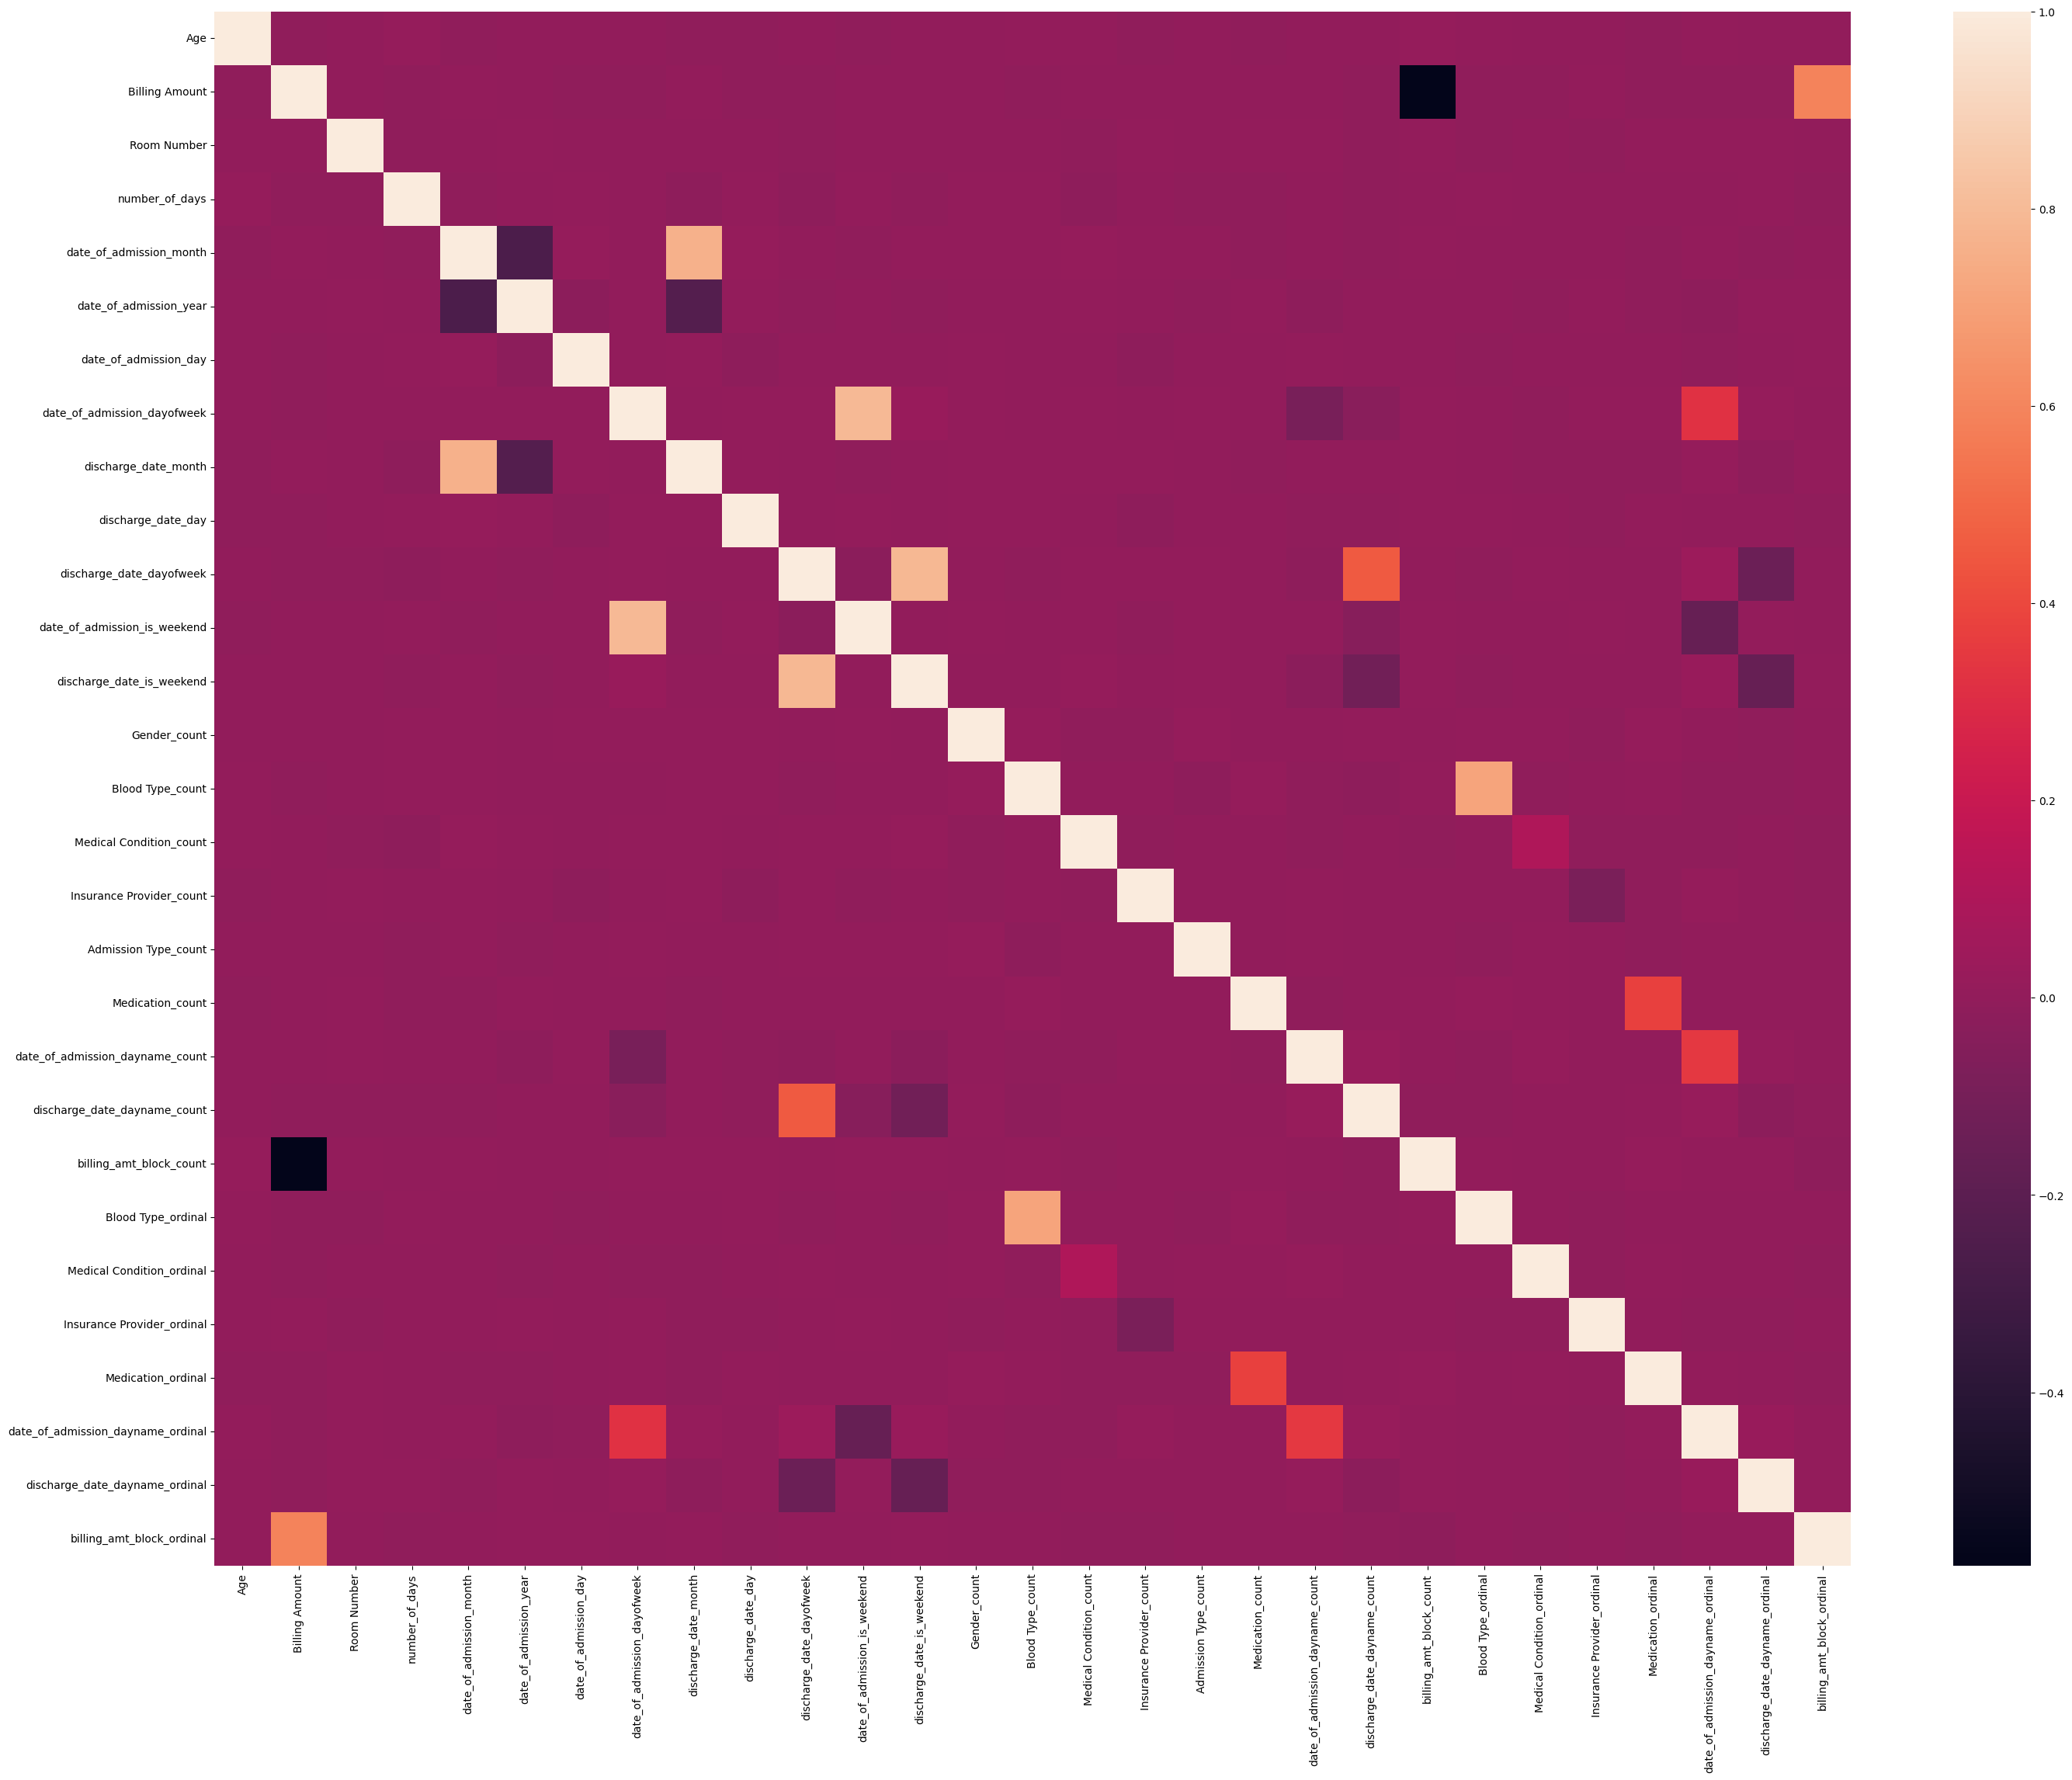

In [79]:
from matplotlib.pyplot import figure
# setting the size of figure
figure(figsize=(34, 26))
dataplot = sns.heatmap(X_train.corr())
plt.show()

**Hyper parameter Tuning**

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

k = 3  
knn = KNeighborsClassifier(n_neighbors = k)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_valid)

In [81]:
class_names = ['Normal', 'Abnormal', 'Inconclusive']
print(classification_report(y_valid, y_pred, target_names=class_names))

              precision    recall  f1-score   support

      Normal       0.35      0.50      0.42      3616
    Abnormal       0.39      0.31      0.34      3696
Inconclusive       0.38      0.30      0.34      3682

    accuracy                           0.37     10994
   macro avg       0.37      0.37      0.37     10994
weighted avg       0.37      0.37      0.37     10994



Learning rate set to 0.095968
0:	learn: 1.0983513	total: 71.8ms	remaining: 1m 11s
100:	learn: 1.0725236	total: 1.84s	remaining: 16.4s
200:	learn: 1.0478842	total: 3.66s	remaining: 14.6s
300:	learn: 1.0258105	total: 5.36s	remaining: 12.4s
400:	learn: 1.0046732	total: 7.08s	remaining: 10.6s
500:	learn: 0.9842695	total: 8.79s	remaining: 8.75s
600:	learn: 0.9646322	total: 10.5s	remaining: 6.99s
700:	learn: 0.9462548	total: 12.3s	remaining: 5.23s
800:	learn: 0.9275286	total: 14.1s	remaining: 3.5s
900:	learn: 0.9096813	total: 15.9s	remaining: 1.74s
999:	learn: 0.8930996	total: 17.6s	remaining: 0us
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 826
[LightGBM] [Info] Number of data points in the train set: 4397

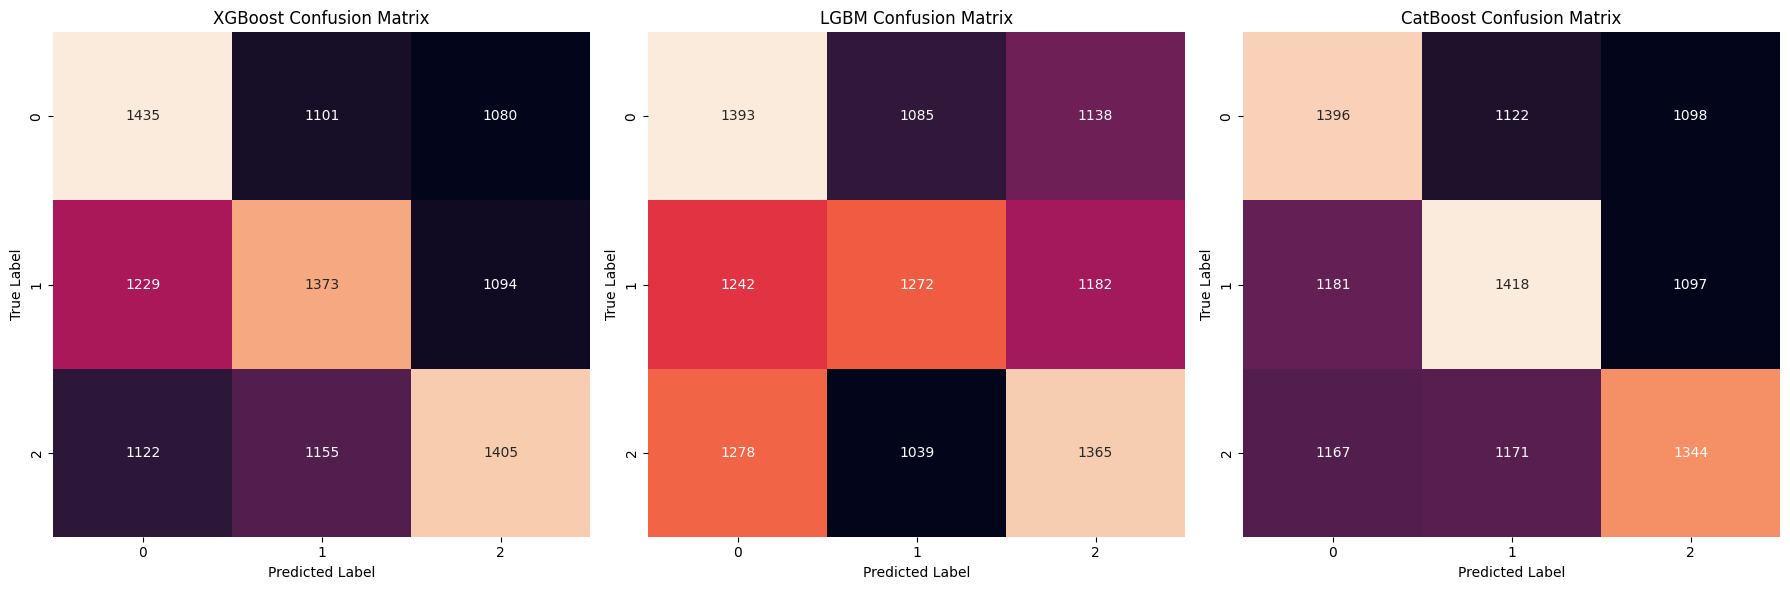

Accuracy of XGBoost Classifier: 0.383209023103511
Accuracy of LGBM Classifier: 0.36656358013461887
Accuracy of CatBoost Classifier: 0.3782062943423686


In [82]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,roc_auc_score




catboost_model = CatBoostClassifier()
lgbm_model = LGBMClassifier()
xgb_model = XGBClassifier()

catboost_model.fit(X_train, y_train, verbose=100)
lgbm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predict on the validation set for each classifier
y_pred_xgb = xgb_model.predict(X_valid)
y_pred_lgbm = lgbm_model.predict(X_valid)
y_pred_catboost = catboost_model.predict(X_valid)

# Compute confusion matrices
cm_xgb = confusion_matrix(y_valid, y_pred_xgb)
cm_lgbm = confusion_matrix(y_valid, y_pred_lgbm)
cm_catboost = confusion_matrix(y_valid, y_pred_catboost)

# Plot confusion matrices
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.heatmap(cm_xgb, annot=True, fmt='d', cbar=False)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 2)
sns.heatmap(cm_lgbm, annot=True, fmt='d', cbar=False)
plt.title('LGBM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 3)
sns.heatmap(cm_catboost, annot=True, fmt='d', cbar=False)
plt.title('CatBoost Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()


accuracy_xgb = accuracy_score(y_valid, y_pred_xgb)
accuracy_lgbm = accuracy_score(y_valid, y_pred_lgbm)
accuracy_catboost = accuracy_score(y_valid, y_pred_catboost)

# Print the accuracies
print("Accuracy of XGBoost Classifier:", accuracy_xgb)
print("Accuracy of LGBM Classifier:", accuracy_lgbm)
print("Accuracy of CatBoost Classifier:", accuracy_catboost)

In [83]:
from sklearn.model_selection import GridSearchCV



# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [1,2,3, 4, 5, 10],
    'lambda': [1, 2,5,7,15],
    
}



xgb_model = XGBClassifier( verbose=0)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best R-squared (R2) Score:", grid_search.best_score_)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV] END ..............depth=1, lambda=1, learning_rate=0.01; total time=   1.2s
[CV] END ..............depth=1, lambda=1, learning_rate=0.01; total time=   1.2s
[CV] END ..............depth=1, lambda=1, learning_rate=0.01; total time=   1.1s
[CV] END ...............depth=1, lambda=1, learning_rate=0.1; total time=   1.1s
[CV] END ...............depth=1, lambda=1, learning_rate=0.1; total time=   2.3s
[CV] END ...............depth=1, lambda=1, learning_rate=0.1; total time=   1.1s
[CV] END ...............depth=1, lambda=1, learning_rate=0.2; total time=   1.1s
[CV] END ...............depth=1, lambda=1, learning_rate=0.2; total time=   1.1s
[CV] END ...............depth=1, lambda=1, learning_rate=0.2; total time=   1.2s
[CV] END ..............depth=1, lambda=2, learning_rate=0.01; total time=   1.2s
[CV] END ..............depth=1, lambda=2, learning_rate=0.01; total time=   1.2s
[CV] END ..............depth=1, lambda=2, learn

[0]	train-auc:0.56356	eval-auc:0.50062
[200]	train-auc:0.93364	eval-auc:0.55398
[400]	train-auc:0.98296	eval-auc:0.57370
[600]	train-auc:0.99578	eval-auc:0.58508
[800]	train-auc:0.99913	eval-auc:0.59340
[999]	train-auc:0.99984	eval-auc:0.59939
accuracy : 42.34127706021466


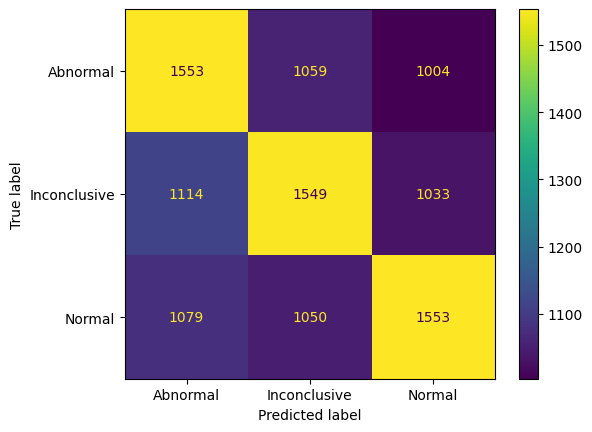

In [84]:

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_valid, label=y_valid)
watchlist = [(dtrain, 'train'), (dtest, 'eval')]
params = {
    'objective': 'multi:softprob',
    'num_class': 3,
    'tree_method':'hist',
    'depth': 1,
    'lambda': 5,
    'learning_rate': 0.2,

    'eval_metric':"auc"
}
num_round = 1000
bst = xgb.train(params, dtrain,num_round,verbose_eval=200,early_stopping_rounds=100,
                evals=watchlist)

yhat = bst.predict(dtest)
preds = yhat.argmax(axis=1)

accuracy = accuracy_score(y_valid, preds)*100
print('accuracy :', str(accuracy))
cm = confusion_matrix(y_valid, preds, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Abnormal', "Inconclusive", "Normal"])
# res_dict = {'Abnormal': 0, 'Normal': 1, 'Inconclusive':2}

disp.plot()

In [86]:
# # save the trained model
# import pickle
# pickle.dump(bst, open("xgb_model.pkl", "wb"))
# #bst.to_pickle('tuned_model.pkl')